<a href="https://colab.research.google.com/github/cornsilk-tea/deeplearning_study/blob/main/cnn_human_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! pip install kaggle

In [3]:
!mkdir /root/.kaggle/
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/   # kaggl.json위치 지정
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!ls /root/.kaggle/ 

kaggle.json


In [5]:
!kaggle datasets download -d vasukipatel/face-recognition-dataset

 98% 713M/726M [00:06<00:00, 135MB/s]
100% 726M/726M [00:06<00:00, 123MB/s]


In [6]:
!unzip face-recognition-dataset.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: Faces/Faces/Alexandra Daddario_76.jpg  
  inflating: Faces/Faces/Alexandra Daddario_77.jpg  
  inflating: Faces/Faces/Alexandra Daddario_78.jpg  
  inflating: Faces/Faces/Alexandra Daddario_79.jpg  
  inflating: Faces/Faces/Alexandra Daddario_8.jpg  
  inflating: Faces/Faces/Alexandra Daddario_80.jpg  
  inflating: Faces/Faces/Alexandra Daddario_81.jpg  
  inflating: Faces/Faces/Alexandra Daddario_82.jpg  
  inflating: Faces/Faces/Alexandra Daddario_83.jpg  
  inflating: Faces/Faces/Alexandra Daddario_84.jpg  
  inflating: Faces/Faces/Alexandra Daddario_85.jpg  
  inflating: Faces/Faces/Alexandra Daddario_86.jpg  
  inflating: Faces/Faces/Alexandra Daddario_87.jpg  
  inflating: Faces/Faces/Alexandra Daddario_88.jpg  
  inflating: Faces/Faces/Alexandra Daddario_89.jpg  
  inflating: Faces/Faces/Alexandra Daddario_9.jpg  
  inflating: Faces/Faces/Alexandra Daddario_90.jpg  
  inflating: Faces/Faces/Alexandra Daddario_91.jpg  
  inflating:

In [7]:
import os, shutil, re
name_list = os.listdir('/content/Original Images/Original Images')
classes_num = len(name_list)
all_file_list = os.listdir('/content/Faces/Faces')

In [8]:
shutil.rmtree('/content/Original Images')

In [9]:
if os.path.exists('/content/datasets'):
    shutil.rmtree('/content/datasets')
os.mkdir('/content/datasets')

for name in name_list:
    if os.path.exists('/content/datasets/' + name):
        shutil.rmtree('/content/datasets/' + name)
    os.mkdir('/content/datasets/' + name)

for name in name_list:
    for file_name in os.listdir('/content/Faces/Faces'):
        if name in file_name:
            shutil.copy('/content/Faces/Faces/' + file_name, '/content/datasets/' + name + '/') 
            
shutil.rmtree('/content/Faces')

In [10]:
dir_list = ['Train', 'Validation', 'Test', 'Temp']
base_dir_path = '/content'
for dir_name in dir_list:
    if os.path.exists(base_dir_path + '/' + dir_name):
        shutil.rmtree(base_dir_path + '/' + dir_name)
    os.mkdir(base_dir_path + '/' + dir_name)
    for name in name_list:
        if os.path.exists(base_dir_path + '/' + dir_name + '/' + name):
            shutil.rmtree(base_dir_path + '/' + dir_name + '/' + name)
        os.mkdir(base_dir_path + '/' + dir_name + '/' + name)

In [11]:
from sklearn.model_selection import train_test_split

for name in name_list:
    data = os.listdir('/content/datasets/' + name)
    train_list, test_list = train_test_split(data, train_size = 0.8, random_state = 111, shuffle = True)

    for file_name in train_list:
        shutil.copy(
            '/content/datasets/' + name + '/' + file_name,
            '/content/Temp/' + name + '/' + file_name
        )

    for file_name in test_list:
        shutil.copy(
            '/content/datasets/' + name + '/' + file_name,
            '/content/Test/' + name + '/' + file_name
        )


In [12]:
for name in name_list:
    data = os.listdir('/content/Temp/' + name)
    train_list, val_list = train_test_split(data, train_size = 0.6, random_state = 111, shuffle = True)

    for file_name in train_list:
        shutil.copy(
            '/content/Temp/' + name + '/' + file_name,
            '/content/Train/' + name + '/' + file_name
        )

    for file_name in val_list:
        shutil.copy(
            '/content/Temp/' + name + '/' + file_name,
            '/content/Validation/' + name + '/' + file_name
        )
shutil.rmtree('/content/Temp')

In [13]:
for name in name_list:
    for dir_name in dir_list[:3]:
        print('{}의 {}데이터 개수 = {}'.format(name, dir_name, len(os.listdir('/content/{}/{}'.format(dir_name, name)))))
    print('')

Camila Cabello의 Train데이터 개수 = 41
Camila Cabello의 Validation데이터 개수 = 28
Camila Cabello의 Test데이터 개수 = 18

Kashyap의 Train데이터 개수 = 14
Kashyap의 Validation데이터 개수 = 10
Kashyap의 Test데이터 개수 = 6

Lisa Kudrow의 Train데이터 개수 = 33
Lisa Kudrow의 Validation데이터 개수 = 23
Lisa Kudrow의 Test데이터 개수 = 14

Alia Bhatt의 Train데이터 개수 = 37
Alia Bhatt의 Validation데이터 개수 = 26
Alia Bhatt의 Test데이터 개수 = 16

Henry Cavill의 Train데이터 개수 = 50
Henry Cavill의 Validation데이터 개수 = 34
Henry Cavill의 Test데이터 개수 = 22

Vijay Deverakonda의 Train데이터 개수 = 55
Vijay Deverakonda의 Validation데이터 개수 = 37
Vijay Deverakonda의 Test데이터 개수 = 23

Marmik의 Train데이터 개수 = 15
Marmik의 Validation데이터 개수 = 10
Marmik의 Test데이터 개수 = 7

Zac Efron의 Train데이터 개수 = 43
Zac Efron의 Validation데이터 개수 = 29
Zac Efron의 Test데이터 개수 = 19

Amitabh Bachchan의 Train데이터 개수 = 35
Amitabh Bachchan의 Validation데이터 개수 = 24
Amitabh Bachchan의 Test데이터 개수 = 15

Brad Pitt의 Train데이터 개수 = 57
Brad Pitt의 Validation데이터 개수 = 39
Brad Pitt의 Test데이터 개수 = 24

Elizabeth Olsen의 Train데이터 개수 = 33
Elizabeth Olsen

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(classes_num, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [16]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        '/content/Train',
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=10,
        # categorical_crossentropy 손실을 사용하기 때문에 2D one-hot 부호화된 라벨이 반환됩니다.
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/Validation',
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

Found 1209 images belonging to 31 classes.
Found 828 images belonging to 31 classes.


In [18]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (10, 150, 150, 3)
배치 레이블 크기: (10, 31)


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

In [20]:
history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/100
50/50 [==============================] - 18s 22ms/step - loss: 3.4336 - accuracy: 0.0360 - val_loss: 3.4125 - val_accuracy: 0.0520
Epoch 2/100
50/50 [==============================] - 1s 18ms/step - loss: 3.3944 - accuracy: 0.0560 - val_loss: 3.3689 - val_accuracy: 0.0640
Epoch 3/100
50/50 [==============================] - 1s 18ms/step - loss: 3.3623 - accuracy: 0.0560 - val_loss: 3.3268 - val_accuracy: 0.0840
Epoch 4/100
50/50 [==============================] - 1s 20ms/step - loss: 3.2883 - accuracy: 0.1082 - val_loss: 3.1889 - val_accuracy: 0.1920
Epoch 5/100
50/50 [==============================] - 1s 18ms/step - loss: 3.1308 - accuracy: 0.1620 - val_loss: 3.0135 - val_accuracy: 0.1800
Epoch 6/100
50/50 [==============================] - 1s 18ms/step - loss: 2.8248 - accuracy: 0.2405 - val_loss: 2.7974 - val_accuracy: 0.2360
Epoch 7/100
50/50 [==============================] - 1s 19ms/step - loss: 2.6536 - accuracy: 0.2920 - val_loss: 2.6625 - val_accuracy: 0.2560
Epoch

In [21]:
model.save('/content/model1.h5')

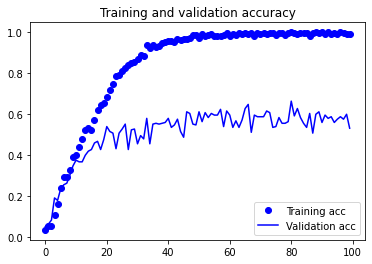

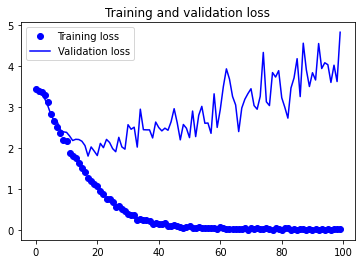

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
datagen = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      #zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='constant')

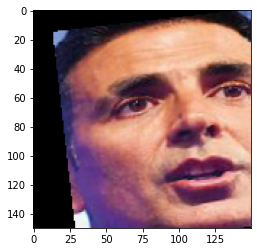

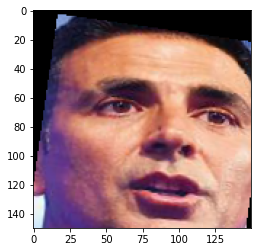

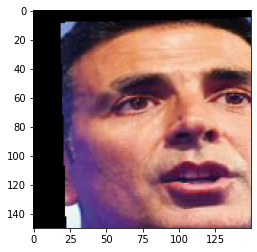

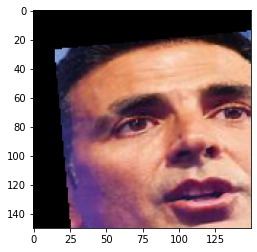

In [24]:
# 이미지 전처리 유틸리티 모듈
# 증식될 이미지 샘플 
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join("/content/Train/Akshay Kumar", fname) for fname in os.listdir("/content/Train/Akshay Kumar")])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    # zoom_range=0.1,
    fill_mode='constant',
    horizontal_flip=True,)

In [27]:
# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        '/content/Train',
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # categorical_crossentropy 손실을 사용하기 때문에 2D one-hot 부호화된 라벨이 반환됩니다.
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/Validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')



Found 1209 images belonging to 31 classes.
Found 828 images belonging to 31 classes.


In [28]:
history = model.fit(
      train_generator,
      steps_per_epoch=30,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/100
30/30 [==============================] - 4s 119ms/step - loss: 3.4351 - accuracy: 0.0367 - val_loss: 3.4141 - val_accuracy: 0.0460
Epoch 2/100
30/30 [==============================] - 3s 112ms/step - loss: 3.4088 - accuracy: 0.0374 - val_loss: 3.4010 - val_accuracy: 0.0840
Epoch 3/100
30/30 [==============================] - 3s 114ms/step - loss: 3.3925 - accuracy: 0.0458 - val_loss: 3.3846 - val_accuracy: 0.0700
Epoch 4/100
30/30 [==============================] - 3s 115ms/step - loss: 3.3945 - accuracy: 0.0533 - val_loss: 3.3555 - val_accuracy: 0.0740
Epoch 5/100
30/30 [==============================] - 3s 113ms/step - loss: 3.3649 - accuracy: 0.0645 - val_loss: 3.3335 - val_accuracy: 0.0740
Epoch 6/100
30/30 [==============================] - 3s 117ms/step - loss: 3.3479 - accuracy: 0.0783 - val_loss: 3.3091 - val_accuracy: 0.0700
Epoch 7/100
30/30 [==============================] - 3s 113ms/step - loss: 3.3119 - accuracy: 0.0849 - val_loss: 3.2631 - val_accuracy: 0.1420

In [29]:
model.save('/content/model2.h5')

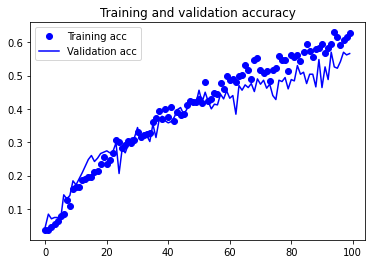

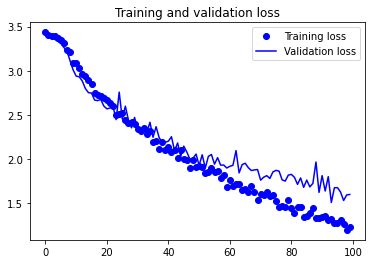

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights=None,
                  include_top=False,
                  input_shape=(150, 150, 3))
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(classes_num, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 31)                7967      
Total params: 16,820,063
Trainable params: 16,820,063
Non-trainable params: 0
_________________________________________________________________


In [33]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30


In [34]:
conv_base.trainable = False

In [35]:
print('conv_base를 동결한 후 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    # zoom_range=0.1,
    fill_mode='constant',
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        '/content/Train',
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/Validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

Found 1209 images belonging to 31 classes.
Found 828 images belonging to 31 classes.


In [37]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
50/50 [==============================] - 8s 131ms/step - loss: 3.4337 - accuracy: 0.0344 - val_loss: 3.4330 - val_accuracy: 0.0440
Epoch 2/30
50/50 [==============================] - 6s 119ms/step - loss: 3.4328 - accuracy: 0.0374 - val_loss: 3.4322 - val_accuracy: 0.0500
Epoch 3/30
50/50 [==============================] - 6s 119ms/step - loss: 3.4323 - accuracy: 0.0394 - val_loss: 3.4316 - val_accuracy: 0.0380
Epoch 4/30
50/50 [==============================] - 6s 117ms/step - loss: 3.4312 - accuracy: 0.0425 - val_loss: 3.4315 - val_accuracy: 0.0480
Epoch 5/30
50/50 [==============================] - 6s 119ms/step - loss: 3.4309 - accuracy: 0.0330 - val_loss: 3.4300 - val_accuracy: 0.0380
Epoch 6/30
50/50 [==============================] - 6s 119ms/step - loss: 3.4303 - accuracy: 0.0445 - val_loss: 3.4296 - val_accuracy: 0.0540
Epoch 7/30
50/50 [==============================] - 6s 119ms/step - loss: 3.4296 - accuracy: 0.0425 - val_loss: 3.4291 - val_accuracy: 0.0500
Epoch 

In [38]:
model.save('/content/model3.h5')

In [39]:
test_generator = test_datagen.flow_from_directory(
        '/content/Test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=20)
print('test acc:', test_acc)

Found 525 images belonging to 31 classes.
20/20 [==============================] - 1s 30ms/step - loss: 3.4135 - accuracy: 0.0875
test acc: 0.08749999850988388


In [40]:
test_generator = test_datagen.flow_from_directory(
        '/content/Test/Akshay Kumar',
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=1)
print('test acc:', test_acc)

Found 0 images belonging to 0 classes.


ValueError: ignored

In [ ]:
!wget -O billie.jpg https://ichef.bbci.co.uk/news/640/cpsprodpb/B75C/production/_118304964_eilish.jpg

In [ ]:
# # 이미지를 읽고 크기를 변경합니다
# img = image.load_img("/content/Test/Akshay Kumar/Akshay Kumar_22.jpg", target_size=(150, 150))

# # (150, 150, 3) 크기의 넘파이 배열로 변환합니다
# x = image.img_to_array(img)

# # (1, 150, 150, 3) 크기로 변환합니다
# x = x.reshape((1,) + x.shape)
# test_loss, test_acc = model.evaluate(x, batch_size=None)
# print('test acc:', test_acc)
for file_name in os.listdir('/content/Test/Akshay Kumar'):
    img = image.load_img("/content/Test/Akshay Kumar/{}".format(file_name), target_size=(150, 150))
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    test_loss, test_acc = model.evaluate(x)
    print('test acc:', test_acc)